# Housing Prices - Eastern Europe
## Eduardo Razo

#### Import librearies

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, output_file, show
from bokeh.models.ranges import Range1d
from bokeh.models import LinearAxis
from bokeh.models.tools import HoverTool

#### Data preparation

###### Housing Prices

In [2]:
# Housing price index
prices = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Housing prices.csv")
prices.head()

,TIME,GEO,PURCHASE,UNIT,Value,Flag and Footnotes
0,2005,Bulgaria,Total,Annual average index,80.09,e
1,2005,Bulgaria,Total,Annual average rate of change,:,NaN
2,2005,Bulgaria,Purchases of new dwellings,Annual average index,67.21,e
3,2005,Bulgaria,Purchases of new dwellings,Annual average rate of change,:,NaN
4,2005,Bulgaria,Purchases of existing dwellings,Annual average index,82.95,NaN


In [3]:
## Renaming columns
prices.rename(columns={'TIME':'Year', 'GEO':'Country'}, inplace=True)

## Dropping columns
prices1 = prices.drop('Flag and Footnotes', axis=1)

## Replacing ":" with "0"
prices1['Value'].replace(':', '0', True)

## Converting "Value" column to float 
prices1['Value'] = prices1['Value'].astype(float)

prices1.head()

,Year,Country,PURCHASE,UNIT,Value
0,2005,Bulgaria,Total,Annual average index,80.09
1,2005,Bulgaria,Total,Annual average rate of change,0.00
2,2005,Bulgaria,Purchases of new dwellings,Annual average index,67.21
3,2005,Bulgaria,Purchases of new dwellings,Annual average rate of change,0.00
4,2005,Bulgaria,Purchases of existing dwellings,Annual average index,82.95


In [4]:
## Subsetting per "Country" and "Year" 
prices2 = prices1.loc[(prices1.UNIT == 'Annual average index') & (prices1.PURCHASE == 'Total')]

## Replacing 0´s in "Value" column
prices2.iloc[1,4] = 104.48
prices2.iloc[2,4] = 94.25
prices2.iloc[3,4] = 98.91
prices2.iloc[8,4] = 98.91

## Renaming columns
prices2.rename(columns={'Value':'Value Housing'}, inplace=True)

## Dropping columns
prices2 = prices2.drop({'PURCHASE', 'UNIT'}, axis=1)

## Sorting
prices2 = prices2.sort_values(by=['Country', 'Year'])

prices2.head()

C:\Users\razow\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\razow\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Year,Country,Value Housing
0,2005,Bulgaria,80.09
30,2006,Bulgaria,91.86
60,2007,Bulgaria,118.42
90,2008,Bulgaria,147.97
120,2009,Bulgaria,117.79


In [5]:
#prices2.to_csv(r'C:/Users/razow\Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/Prices.csv')

###### Interest Rates

In [6]:
# Interest Rates
Int_Rates = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Interest rates.csv")
Int_Rates.head(2)

,SUBJECT,Subject,LOCATION,Country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,IRLT,"Long-term interest rates, Per cent per annum",BUL,Bulgaria,A,Annual,2005,2005,PC,Percentage,0,Units,NaN,NaN,0.0,NaN,NaN
1,IRLT,"Long-term interest rates, Per cent per annum",BUL,Bulgaria,A,Annual,2006,2006,PC,Percentage,0,Units,NaN,NaN,0.0,NaN,NaN


In [7]:
## Dropping columns
Int_Rates1 = Int_Rates.drop({'SUBJECT', 'Subject', 'LOCATION', 'FREQUENCY', 'Frequency', 'TIME', 'Unit Code', 'Unit', 
                             'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes',
                             'Flags'}, axis=1)

## Renaming columns
Int_Rates1.rename(columns={'Time':'Year', 'Value':'Value IntRate'}, inplace=True)

## Sorting
Int_Rates1 = Int_Rates1.sort_values(by=['Country', 'Year'])

Int_Rates1.head()

,Country,Year,Value IntRate
0,Bulgaria,2005,0.0
1,Bulgaria,2006,0.0
2,Bulgaria,2007,0.0
3,Bulgaria,2008,0.0
4,Bulgaria,2009,0.0


In [8]:
#Int_Rates1.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/IntRates.csv')

###### GDP Per Capita

In [9]:
# GDP
GDP = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/GDP.csv")
GDP.head()

,freq;na_item;ppp_cat;geo\TIME_PERIOD,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A;VI_PPS_EU28_HAB;GDP;BG,40,40,40,43,43,44,45,46,45,47,47,49,50,51
1,A;VI_PPS_EU28_HAB;GDP;HU,60,60,60,63,64,65,66,66,67,68,69,68,68,71
2,A;VI_PPS_EU28_HAB;GDP;LT,60,60,60,63,56,60,66,70,73,75,74,75,78,80
3,A;VI_PPS_EU28_HAB;GDP;LV,57,57,57,59,52,53,57,60,62,63,64,64,66,69
4,A;VI_PPS_EU28_HAB;GDP;PL,53,53,53,55,59,62,65,67,67,67,68,68,69,70


In [10]:
## Renaming columns
GDP.rename(columns={'freq;na_item;ppp_cat;geo\TIME_PERIOD':'Country'}, inplace=True)

## Replacing country names 
GDP['Country'].replace('A;VI_PPS_EU28_HAB;GDP;BG', 'Bulgaria', True)
GDP['Country'].replace('A;VI_PPS_EU28_HAB;GDP;HU', 'Hungary', True)
GDP['Country'].replace('A;VI_PPS_EU28_HAB;GDP;LT', 'Lithuania', True)
GDP['Country'].replace('A;VI_PPS_EU28_HAB;GDP;LV', 'Latvia', True)
GDP['Country'].replace('A;VI_PPS_EU28_HAB;GDP;PL', 'Poland', True)

## Melting data set
GDP1 = GDP.melt(id_vars=['Country'],
                    var_name="Year",
                    value_name="Value")

## Converting 'Value' column to integer
GDP1['Year'] = GDP1['Year'].astype(int) 

## Renaming columns
GDP1.rename(columns={'Value':'Value GDP'}, inplace=True)

## Sorting
GDP1 = GDP1.sort_values(by=['Country', 'Year'])

GDP1.head()

,Country,Year,Value GDP
0,Bulgaria,2005,40
5,Bulgaria,2006,40
10,Bulgaria,2007,40
15,Bulgaria,2008,43
20,Bulgaria,2009,43


In [11]:
#GDP1.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/GDP.csv')

###### Employment

In [12]:
# Employment
Employment = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Employment.csv")
Employment.head()

,TIME,GEO,AGE,UNIT,SEX,INDIC_EM,Value,Flag and Footnotes
0,2005,Bulgaria,From 15 to 64 years,Thousand persons,Total,Total employment (resident population concept ...,"2,947",NaN
1,2005,Latvia,From 15 to 64 years,Thousand persons,Total,Total employment (resident population concept ...,942,NaN
2,2005,Lithuania,From 15 to 64 years,Thousand persons,Total,Total employment (resident population concept ...,"1,414",NaN
3,2005,Hungary,From 15 to 64 years,Thousand persons,Total,Total employment (resident population concept ...,"3,879",NaN
4,2005,Poland,From 15 to 64 years,Thousand persons,Total,Total employment (resident population concept ...,"13,834",NaN


In [13]:
## Dropping columns
Employment1 = Employment.drop({'UNIT', 'INDIC_EM', 'Flag and Footnotes', 'AGE', 'SEX'}, axis=1)

## Renaming columns
Employment1.rename(columns={'TIME':'Year', 'GEO':'Country'}, inplace=True)

## Removing commas from 'Value' column
Employment1['Value'] = Employment1['Value'].replace(',', '', regex=True)

## Converting 'Value' column to integer
Employment1['Value'] = Employment1['Value'].astype(int)

## Renaming columns
Employment1.rename(columns={'Value':'Value Employ'}, inplace=True)

## Sorting
Employment1 = Employment1.sort_values(by=['Country', 'Year'])

Employment1.head()

,Year,Country,Value Employ
0,2005,Bulgaria,2947
5,2006,Bulgaria,3072
10,2007,Bulgaria,3209
15,2008,Bulgaria,3306
20,2009,Bulgaria,3205


In [14]:
#Employment1.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/Employ.csv')

###### Loans

In [15]:
# Loans
Loans = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Loans.csv")
Loans.head()

,freq;unit;co_nco;na_item;finpos;sector;geo\TIME_PERIOD,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,A;PC_GDP;NCO;F4;LIAB;S14;BG,5.9,4.2,9.5,7.6,0.0,0.1,0.1,-0.3,0.2,0.2,0.2,0.8,1.4,2.3
1,A;PC_GDP;NCO;F4;LIAB;S14;HU,4.6,4.9,5.7,4.9,-0.3,-1.1,-3.5,-3.3,-1.5,-1.0,-3.4,0.2,0.4,0.9
2,A;PC_GDP;NCO;F4;LIAB;S14;LT,5.9,8.4,9.6,4.8,-1.8,-1.8,-0.9,-0.5,0.0,0.4,1.4,1.6,1.6,1.7
3,A;PC_GDP;NCO;F4;LIAB;S14;LV,13.5,17.6,13.2,2.5,-4.3,-3.2,-3.0,-3.2,-1.3,-1.4,-0.7,0.1,0.5,0.3
4,A;PC_GDP;NCO;F4;LIAB;S14;PL,2.7,4.7,6.7,6.7,3.7,2.7,2.4,1.4,1.7,1.5,1.4,1.5,1.7,2.1


In [16]:
## Renaming columns
Loans.rename(columns={'freq;unit;co_nco;na_item;finpos;sector;geo\TIME_PERIOD':'Country'}, inplace=True)

## Replacing country names 
Loans['Country'].replace('A;PC_GDP;NCO;F4;LIAB;S14;BG', 'Bulgaria', True)
Loans['Country'].replace('A;PC_GDP;NCO;F4;LIAB;S14;HU', 'Hungary', True)
Loans['Country'].replace('A;PC_GDP;NCO;F4;LIAB;S14;LT', 'Lithuania', True)
Loans['Country'].replace('A;PC_GDP;NCO;F4;LIAB;S14;LV', 'Latvia', True)
Loans['Country'].replace('A;PC_GDP;NCO;F4;LIAB;S14;PL', 'Poland', True)

Loans.head()

,Country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bulgaria,5.9,4.2,9.5,7.6,0.0,0.1,0.1,-0.3,0.2,0.2,0.2,0.8,1.4,2.3
1,Hungary,4.6,4.9,5.7,4.9,-0.3,-1.1,-3.5,-3.3,-1.5,-1.0,-3.4,0.2,0.4,0.9
2,Lithuania,5.9,8.4,9.6,4.8,-1.8,-1.8,-0.9,-0.5,0.0,0.4,1.4,1.6,1.6,1.7
3,Latvia,13.5,17.6,13.2,2.5,-4.3,-3.2,-3.0,-3.2,-1.3,-1.4,-0.7,0.1,0.5,0.3
4,Poland,2.7,4.7,6.7,6.7,3.7,2.7,2.4,1.4,1.7,1.5,1.4,1.5,1.7,2.1


In [17]:
## Melting data set
Loans1 = Loans.melt(id_vars=['Country'],
                    var_name="Year",
                    value_name="Value")

## Converting 'Value' column to integer
Loans1['Year'] = Loans1['Year'].astype(int) 

## Renaming columns
Loans1.rename(columns={'Value':'Value Loans'}, inplace=True)

## Sorting
Loans1 = Loans1.sort_values(by=['Country', 'Year'])

Loans1.head()

,Country,Year,Value Loans
0,Bulgaria,2005,5.9
5,Bulgaria,2006,4.2
10,Bulgaria,2007,9.5
15,Bulgaria,2008,7.6
20,Bulgaria,2009,0.0


In [18]:
#Loans1.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/Loans.csv')

###### Population

In [19]:
# Population
Population = pd.read_csv("C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Population.csv")
Population.head()

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2005,Bulgaria,Total,Total,Number,"7,688,573",NaN
1,2005,Latvia,Total,Total,Number,"2,249,724",NaN
2,2005,Lithuania,Total,Total,Number,"3,355,220",NaN
3,2005,Hungary,Total,Total,Number,"10,097,549",NaN
4,2005,Poland,Total,Total,Number,"38,173,835",NaN


In [20]:
## Dropping columns
Population1 = Population.drop({'UNIT', 'Flag and Footnotes', 'SEX', 'AGE'}, axis=1)

## Renaming columns
Population1.rename(columns={'TIME':'Year', 'GEO':'Country'}, inplace=True)

## Removing commas from 'Value' column
Population1['Value'] = Population1['Value'].replace(',', '', regex=True) 

## Converting 'Value' column to integer
Population1['Value'] = Population1['Value'].astype(int) 

## Renaming columns
Population1.rename(columns={'Value':'Value Popul'}, inplace=True)

## Sorting
Population1 = Population1.sort_values(by=['Country', 'Year'])

Population1.head()

,Year,Country,Value Popul
0,2005,Bulgaria,7688573
5,2006,Bulgaria,7629371
10,2007,Bulgaria,7572673
15,2008,Bulgaria,7518002
20,2009,Bulgaria,7467119


In [21]:
#Population1.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/Popul.csv')

In [22]:
## Merging datasets prices2 and Int_Rates1

left_table = prices2
right_table = Int_Rates1

merge1 = pd.merge(left_table,
        right_table,
        how= "inner",
        left_on=('Country', 'Year'), right_on=('Country', 'Year'))

merge1.head()

,Year,Country,Value Housing,Value IntRate
0,2005,Bulgaria,80.09,0.0
1,2006,Bulgaria,91.86,0.0
2,2007,Bulgaria,118.42,0.0
3,2008,Bulgaria,147.97,0.0
4,2009,Bulgaria,117.79,0.0


In [23]:
## Merging datasets merge1 and GDP1

left_table = merge1
right_table = GDP1

merge2 = pd.merge(left_table,
        right_table,
        how= "inner",
        left_on=('Country', 'Year'), right_on=('Country', 'Year'))

merge2.head()

,Year,Country,Value Housing,Value IntRate,Value GDP
0,2005,Bulgaria,80.09,0.0,40
1,2006,Bulgaria,91.86,0.0,40
2,2007,Bulgaria,118.42,0.0,40
3,2008,Bulgaria,147.97,0.0,43
4,2009,Bulgaria,117.79,0.0,43


In [24]:
## Merging datasets merge2 and Employment1

left_table = merge2
right_table = Employment1

merge3 = pd.merge(left_table,
        right_table,
        how= "inner",
        left_on=('Country', 'Year'), right_on=('Country', 'Year'))

merge3.head()

,Year,Country,Value Housing,Value IntRate,Value GDP,Value Employ
0,2005,Bulgaria,80.09,0.0,40,2947
1,2006,Bulgaria,91.86,0.0,40,3072
2,2007,Bulgaria,118.42,0.0,40,3209
3,2008,Bulgaria,147.97,0.0,43,3306
4,2009,Bulgaria,117.79,0.0,43,3205


In [25]:
## Merging datasets merge3 and Loans1

left_table = merge3
right_table = Loans1

merge4 = pd.merge(left_table,
        right_table,
        how= "inner",
        left_on=('Country', 'Year'), right_on=('Country', 'Year'))

merge4.head()

,Year,Country,Value Housing,Value IntRate,Value GDP,Value Employ,Value Loans
0,2005,Bulgaria,80.09,0.0,40,2947,5.9
1,2006,Bulgaria,91.86,0.0,40,3072,4.2
2,2007,Bulgaria,118.42,0.0,40,3209,9.5
3,2008,Bulgaria,147.97,0.0,43,3306,7.6
4,2009,Bulgaria,117.79,0.0,43,3205,0.0


In [26]:
## Merging datasets merge4 and Population1

left_table = merge4
right_table = Population1

Master_dataset = pd.merge(left_table,
        right_table,
        how= "inner",
        left_on=('Country', 'Year'), right_on=('Country', 'Year'))

Master_dataset.head()

,Year,Country,Value Housing,Value IntRate,Value GDP,Value Employ,Value Loans,Value Popul
0,2005,Bulgaria,80.09,0.0,40,2947,5.9,7688573
1,2006,Bulgaria,91.86,0.0,40,3072,4.2,7629371
2,2007,Bulgaria,118.42,0.0,40,3209,9.5,7572673
3,2008,Bulgaria,147.97,0.0,43,3306,7.6,7518002
4,2009,Bulgaria,117.79,0.0,43,3205,0.0,7467119


In [27]:
#Master_dataset.to_csv(r'C:/Users/razow/Desktop/IESEG Subjects/7 Financial Programming/Individual project/Datasets/Final datasets/Master_dataset.csv')

#### Data visualization

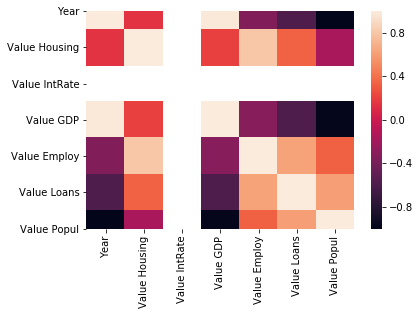

In [29]:
## Identifying correlations in Bulgaria
## Interest rates variables (correlation) are white color since there was not information available for Bulgaria

corr = Master_dataset.loc[(Master_dataset.Country == 'Bulgaria')].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

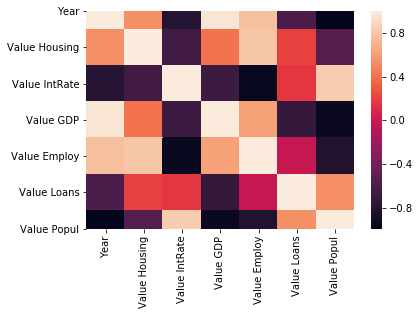

In [30]:
## Identifying correlations in Hungary
corr = Master_dataset.loc[(Master_dataset.Country == 'Hungary')].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

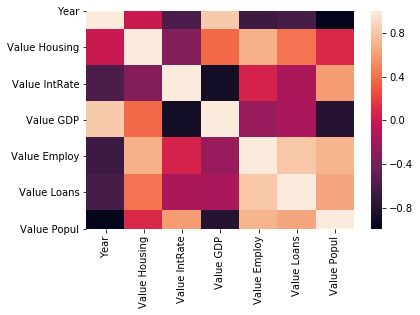

In [31]:
## Identifying correlations in Latvia
corr = Master_dataset.loc[(Master_dataset.Country == 'Latvia')].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

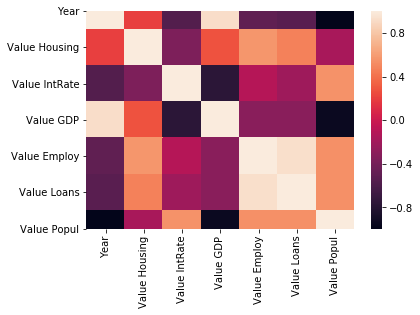

In [32]:
## Identifying correlations in Lithuania
corr = Master_dataset.loc[(Master_dataset.Country == 'Lithuania')].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

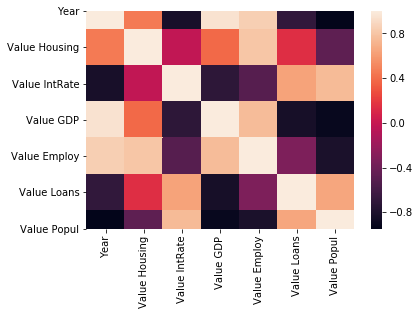

In [33]:
## Identifying correlations in Poland
corr = Master_dataset.loc[(Master_dataset.Country == 'Poland')].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [61]:
## Plotting housing prices per country

output_file("Housing_Prices.html")

p = figure(title='Housing Prices - Eastern Europe',plot_width=900, plot_height=600)

x = Master_dataset['Year']
y1= Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Housing')]
y2= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]
y3= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Housing')]
y4= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]
y5= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

p.xaxis.axis_label= 'Year'
p.yaxis.axis_label= 'Index Prices'

p.line(x, y1, legend="Bulgaria", line_width=2, line_color="blue")

p.line(x, y2, legend="Hungary", line_width=2, line_color="yellow")

p.line(x, y3, legend="Latvia", line_width=2, line_color="green")

p.line(x, y4, legend="Lithuania", line_width=2, line_color="orange")

p.line(x, y5, legend="Poland", line_width=2, line_color="gray")

show(p)

In [35]:
####Hungary Housing prices vs Interest Rates

In [1]:
## Plotting housing prices and interest rates per country

output_file("line_bar.html")

p1 = figure(title='Hungary',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yH= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value IntRate')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer

p1.line(x1, yH, legend="Interest Rates", line_width=2, y_range_name="foo", line_color="navy")

show(p1)

NameError: name 'output_file' is not defined

#### Housing prices vs Interest Rates

#### Latvia

In [37]:
## Plotting housing prices and interest rates per country

output_file("line_bar.html")
p1 = figure(title='Latvia',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']

yLa= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value IntRate')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLa, legend="Interest Rates", line_width=2, y_range_name="foo", line_color="green")

show(p1)

#### Lithuania

In [38]:
## Plotting housing prices and interest rates per country

output_file("line_bar.html")

p1 = figure(title='Lithuania',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLi= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value IntRate')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLi, legend="Interest Rates", line_width=2, y_range_name="foo", line_color="orange")

show(p1)

#### Poland

In [39]:
## Plotting housing prices and interest rates per country

output_file("line_bar.html")

p1 = figure(title='Poland',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yP= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value IntRate')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yP, legend="Interest Rates", line_width=2, y_range_name="foo", line_color="darkslategray")

show(p1)

# Housing Prices vs Loans

#### Bulgaria

In [40]:
## Plotting housing prices and loans per country

output_file("line_bar.html")

p1 = figure(title='Bulgaria',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yB= Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Loans')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=-0.9, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yB, legend="Loans", line_width=2, y_range_name="foo", line_color="blue")

show(p1)

#### Hungary

In [62]:
## Plotting housing prices and loans per country

output_file("line_bar.html")

p1 = figure(title='Hungary',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yH= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Loans')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=-5.0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yH, legend="Loans", line_width=2, y_range_name="foo", line_color="navy")

show(p1)

#### Latvia

In [42]:
## Plotting housing prices and loans per country

output_file("line_bar.html")

p1 = figure(title='Latvia',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLa= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Loans')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=-5.0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLa, legend="Loans", line_width=2, y_range_name="foo", line_color="green")

show(p1)

#### Lithuania

In [43]:
## Plotting housing prices and loans per country

output_file("line_bar.html")

p1 = figure(title='Lithuania',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLi= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Loans')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=-5.0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLi, legend="Loans", line_width=2, y_range_name="foo", line_color="orange")

show(p1)

#### Poland

In [44]:
## Plotting housing prices and loans per country

output_file("line_bar.html")

p1 = figure(title='Poland',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yP= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Loans')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=-5.0, end=20)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yP, legend="Loans", line_width=2, y_range_name="foo", line_color="darkslategray")

show(p1)

## Housing Prices vs GDP

#### Bulgaria

In [45]:
## Plotting housing prices and GDP per country

output_file("line_bar.html")

p1 = figure(title='Bulgaria',plot_width=1000, plot_height=600)

x1= Master_dataset['Year']
yB= Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value GDP')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=35, end=55)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yB, legend="GDP Per Capita", line_width=2, y_range_name="foo", line_color="deepskyblue")

show(p1)

#### Hungary

In [46]:
## Plotting housing prices and GDP per country

output_file("line_bar.html")

p1 = figure(title='Hungary',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yH= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value GDP')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=55, end=75)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yH, legend="GDP Per Capita", line_width=2, y_range_name="foo", line_color="navy")

show(p1)

#### Latvia

In [47]:
## Plotting housing prices and GDP per country

output_file("line_bar.html")

p1 = figure(title='Latvia',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLa= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value GDP')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=50, end=75)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLa, legend="GDP Per Capita", line_width=2, y_range_name="foo", line_color="green")

show(p1)

#### Lithuania

In [48]:
## Plotting housing prices and GDP per country

output_file("line_bar.html")

p1 = figure(title='Lithuania',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLi= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value GDP')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=55, end=85)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLi, legend="GDP Per Capita", line_width=2, y_range_name="foo", line_color="orange")

show(p1)

#### Poland

In [49]:
## Plotting housing prices and GDP per country

output_file("line_bar.html")

p1 = figure(title='Poland',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yP= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value GDP')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=50, end=75)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yP, legend="GDP Per Capita", line_width=2, y_range_name="foo", line_color="darkslategray")

show(p1)

## Housing Prices vs Employment

###### Bulgaria

In [50]:
## Plotting housing prices and employment per country

output_file("line_bar.html")

p1 = figure(title='Bulgaria',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yB= Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Employ')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=2800, end=3500)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yB, legend="Employment", line_width=2, y_range_name="foo", line_color="deepskyblue")

show(p1)

#### Hungary

In [51]:
## Plotting housing prices and employment per country

output_file("line_bar.html")

p1 = figure(title='Hungary',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yH= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Employ')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=3600, end=4500)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yH, legend="Employment", line_width=2, y_range_name="foo", line_color="navy")

show(p1)

#### Latvia

In [52]:
## Plotting housing prices and employment per country

output_file("line_bar.html")

p1 = figure(title='Latvia',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLa= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Employ')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=700, end=1100)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLa, legend="Employment", line_width=2, y_range_name="foo", line_color="green")

show(p1)

#### Lithuania

In [53]:
## Plotting housing prices and employment per country

output_file("line_bar.html")

p1 = figure(title='Lithuania',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLi= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Employ')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=1100, end=1500)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLi, legend="Employment", line_width=2, y_range_name="foo", line_color="orange")

show(p1)

#### Poland

In [54]:
## Plotting housing prices and employment per country

output_file("line_bar.html")

p1 = figure(title='Poland',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yP= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Employ')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=13000, end=17000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yP, legend="Employment", line_width=2, y_range_name="foo", line_color="darkslategray")

show(p1)

## Housing Prices vs Population

#### Bulgaria

In [55]:
## Plotting housing prices and population per country

output_file("line_bar.html")

p1 = figure(title='Bulgaria',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yB= Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Popul')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Bulgaria', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=7000000, end=7700000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yB, legend="Population", line_width=2, y_range_name="foo", line_color="deepskyblue")

show(p1)

#### Hungary

In [56]:
## Plotting housing prices and population per country

output_file("line_bar.html")

p1 = figure(title='Hungary',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yH= Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Popul')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Hungary', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=9600000, end=10200000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yH, legend="Population", line_width=2, y_range_name="foo", line_color="navy")

show(p1)

#### Latvia

In [57]:
## Plotting housing prices and population per country

output_file("line_bar.html")

p1 = figure(title='Latvia',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLa= Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Popul')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Latvia', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=1900000, end=2300000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLa, legend="Population", line_width=2, y_range_name="foo", line_color="green")

show(p1)

#### Lithuania

In [58]:
## Plotting housing prices and population per country

output_file("line_bar.html")

p1 = figure(title='Lithuania',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yLi= Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Popul')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Lithuania', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=2700000, end=3400000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yLi, legend="Population", line_width=2, y_range_name="foo", line_color="orange")

show(p1)

#### Poland

In [59]:
## Plotting housing prices and population per country

output_file("line_bar.html")

p1 = figure(title='Poland',plot_width=1000, plot_height=600)
x1= Master_dataset['Year']
yP= Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Popul')]

# setting bar values
h = Master_dataset.loc[(Master_dataset.Country == 'Poland', 'Value Housing')]

# Correcting the bottom position of the bars to be on the 0 line.
adj_h = h/2

# add bar renderer
p1.rect(x1, y=adj_h, legend="Housing Prices", width=0.4, height=h, color="gainsboro")

# Setting the y  axis range   
p1.y_range = Range1d(0, 200)

# Setting the second y axis range name and range
p1.extra_y_ranges = {"foo": Range1d(start=37900000, end=38200000)}

# Adding the second axis to the plot.  
p1.add_layout(LinearAxis(y_range_name="foo"), 'right')

# Add a line renderer
p1.line(x1, yP, legend="Population", line_width=2, y_range_name="foo", line_color="darkslategray")

show(p1)